In [1]:
%matplotlib inline

In [2]:
import pandas as pd

# Load the dream5 dataset
Please download the following datasets from the [dream5 dedicated website] (you need to create an account first)(https://www.synapse.org/#!Synapse:syn3130840):


+ `net3_expression_data.tsv`: E. coli gene expression data (MicroArray)
+ `net3_transcription_factors.tsv`: transcription factor genes

### Load the datasets
+ Load the gene expression dataset $X$

In [3]:
X = pd.read_csv("net3_expression_data.tsv",sep="\t")# rows represent genes and columns represent conditions

+ Load the Transcription Factors list

In [4]:
tf = pd.read_csv("net3_transcription_factors.tsv",header=None)[0]

# Preprocessing

Apply a simple z-score gene-wise (axis=0)

In [5]:
from classifiedgrni.Preprocessing.standard_preprocessing import z_score

In [6]:
X = z_score(X,axis=0)

# Infer the GRN
+ Load the score links function and SVM classification method

In [8]:
from classifiedgrni.Inference.inference import score_links
from classifiedgrni.Inference.classification_predictors import SVM_classifier_score

+ Choose the parameters of the underlying SVM method

(the parameters are the same as those of [sklearn SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))

In [9]:
SVM_params = {"C":1.0,"max_iter":1000000}

+ Build a discretization method to run the classification algorithm on discrete classes using `discretize_genexp`

In [10]:
from classifiedgrni.Preprocessing.discretization import discretize_genexp
method = "kmeans"
bins = 2
kmeans_discretizer = lambda x: discretize_genexp(x, method, bins)

+ Score all the possible edges between Transcription Factors and Target Genes

In [11]:
score_matrix = score_links(gene_expression_matrix=X,
                           score_predictor=SVM_classifier_score,
                           tf_list=tf,
                           discr_method=kmeans_discretizer,
                           **SVM_params)

4511it [09:45,  7.70it/s]


# Visualize the results

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

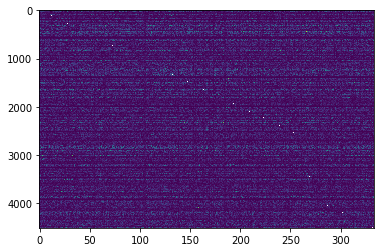

In [13]:
plt.imshow(score_matrix,aspect="auto")

# Rank the links according to their scores

In [14]:
from grenadine.Inference.inference import rank_GRN
ranking = rank_GRN(score_matrix)

In [15]:
ranking.head(20)

rank     score    TF     TG
G13_G303     1.0  2.242497   G13   G303
G255_G4261   2.0  2.229587  G255  G4261
G216_G4221   3.0  2.224943  G216  G4221
G130_G15     4.0  2.206879  G130    G15
G292_G4144   5.0  2.174397  G292  G4144
G226_G2531   6.0  2.158416  G226  G2531
G201_G1991   7.0  2.109408  G201  G1991
G193_G4013   8.0  2.103866  G193  G4013
G86_G1703    9.0  2.084629   G86  G1703
G171_G912   10.0  2.032375  G171   G912
G179_G3759  11.0  2.016467  G179  G3759
G161_G2745  12.0  2.016383  G161  G2745
G116_G1284  13.0  2.013719  G116  G1284
G122_G1072  14.0  2.010621  G122  G1072
G234_G3959  15.0  2.008292  G234  G3959
G168_G1923  16.0  2.006151  G168  G1923
G326_G3847  17.0  2.004794  G326  G3847
G132_G1262  18.0  1.998937  G132  G1262
G39_G1399   19.0  1.995864   G39  G1399
G93_G2656   20.0  1.989804   G93  G2656